In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
datadir_raw = 'F:/Masters/MRP/Datasets_Raw/'
datadir_final = 'F:/Masters/MRP/Datasets/'

In [3]:
income = pd.read_csv(datadir_raw+'Income_Data/Income_data.csv')
income

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [4]:
income.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [5]:
income.dropna(subset=['Annual_income'], inplace=True) #Dropping rows with 'nan' income values
income['Birthday_count'] = income['Birthday_count'].interpolate(method='linear') #Handling 'nan' birthday count values in by using interpolate linear method for getting the individuals age
income['Age'] = [int(abs(i)/365.25) for i in income['Birthday_count']] #creating new column age and storing age based on the birthday_counts column
income['GENDER'].fillna(random.choice(['F', 'M']), inplace=True) #filling random gender for 'nan' values in Gender column
income.drop(columns=['Mobile_phone','Work_Phone','Phone','EMAIL_ID'], inplace=True) #Dropping columns not required for calculating Financial Risk Tolerence Index
temp = []
for i in income['Employed_days']:
    if int(i) >= 0:
        temp.append(0)
    else:
        temp.append(1)
income['Employed'] = temp #creating new column 'Employed' which contains wheather a individual is employed or not (1 - Employed, 0 - Not Employed)
income['Annual_income'] = [int(i)*3.75 for i in income['Annual_income']] #as the income are based on US Economy so multiplying it with '3.75', the price parity ratio between US and India 
income.columns = ['Ind_ID', 'Gender', 'Car_Owner', 'Property_Owner', 'Children',
       'Annual_income', 'Income_source', 'Education', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Occupation_type', 'Family_Members', 'Age', 'Employed'] #Updating column names to simple standard column names 
income.to_csv(datadir_final+'Income_Data/Income_data.csv') #Saving the final file to Final Datasets folder
income

,Ind_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Income_source,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Occupation_type,Family_Members,Age,Employed
0,5008827,M,Y,Y,0,675000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,51,0
1,5009744,F,Y,N,0,1181250.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,37,1
2,5009746,F,Y,N,0,1181250.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,37,1
4,5009752,F,Y,N,0,1181250.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,37,1
5,5009753,F,Y,N,0,1181250.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,Y,N,1,1350000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,Drivers,3,30,1
1544,5023655,F,N,N,0,843750.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,Accountants,1,28,1
1545,5115992,M,Y,Y,2,675000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,Managers,4,36,1
1546,5118219,M,Y,N,0,1012500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,Drivers,2,41,1


In [6]:
income.isna().sum()

Ind_ID               0
Gender               0
Car_Owner            0
Property_Owner       0
Children             0
Annual_income        0
Income_source        0
Education            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Occupation_type    480
Family_Members       0
Age                  0
Employed             0
dtype: int64

In [7]:
income_file = pd.read_csv(datadir_final+'Income_Data/Income_data.csv')

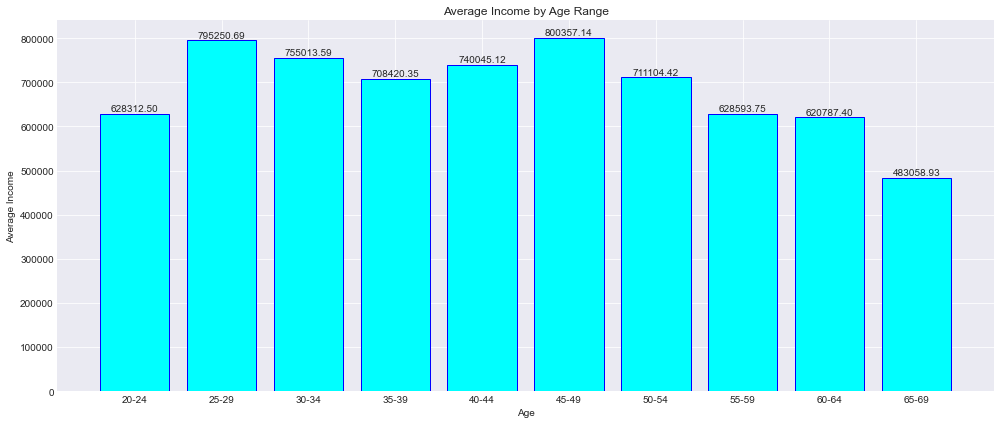

In [8]:
income_data = np.array(income_file['Annual_income'])
age_data = np.array(income_file['Age'])

age_ranges = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69']
average_income = []
for i in range(len(age_ranges)):
    lower_bound = i * 5 + 20
    upper_bound = (i + 1) * 5 + 19
    incomes_in_range = [income for age, income in zip(age_data, income_data) if lower_bound <= age <= upper_bound]
    if incomes_in_range:
        average_income.append(sum(incomes_in_range) / len(incomes_in_range))
    else:
        average_income.append(0)

plt.figure(figsize=(14, 6))  
plt.style.use('seaborn-darkgrid')  

bars = plt.bar(age_ranges, average_income, color='cyan', edgecolor='blue')

for bar, income in zip(bars, average_income):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, f'{income:.2f}', ha='center', va='bottom')

plt.xlabel('Age')
plt.ylabel('Average Income')
plt.title('Average Income by Age Range')

plt.tight_layout()  
plt.show()

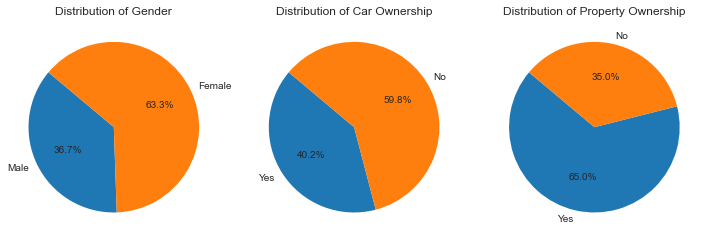

In [9]:
gender_data = {'Male': income_file['Gender'].value_counts()['M'], 'Female': income_file['Gender'].value_counts()['F']}
car_owner_data = {'Yes': income_file['Car_Owner'].value_counts()['Y'], 'No': income_file['Car_Owner'].value_counts()['N']}
property_owner_data = {'Yes': income_file['Property_Owner'].value_counts()['Y'], 'No': income_file['Property_Owner'].value_counts()['N']}

plt.figure(figsize=(10, 4))  
plt.subplot(1, 3, 1)
plt.pie(gender_data.values(), labels=gender_data.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')

plt.subplot(1, 3, 2)
plt.pie(car_owner_data.values(), labels=car_owner_data.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car Ownership')

plt.subplot(1, 3, 3)
plt.pie(property_owner_data.values(), labels=property_owner_data.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Property Ownership')

plt.tight_layout()  
plt.show()

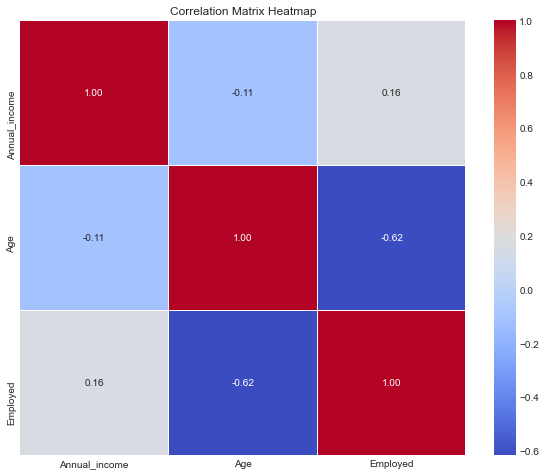

In [10]:
df = income_file[['Annual_income', 'Age', 'Employed']]
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
income_temp = income_file.dropna(subset=['Occupation_type'])

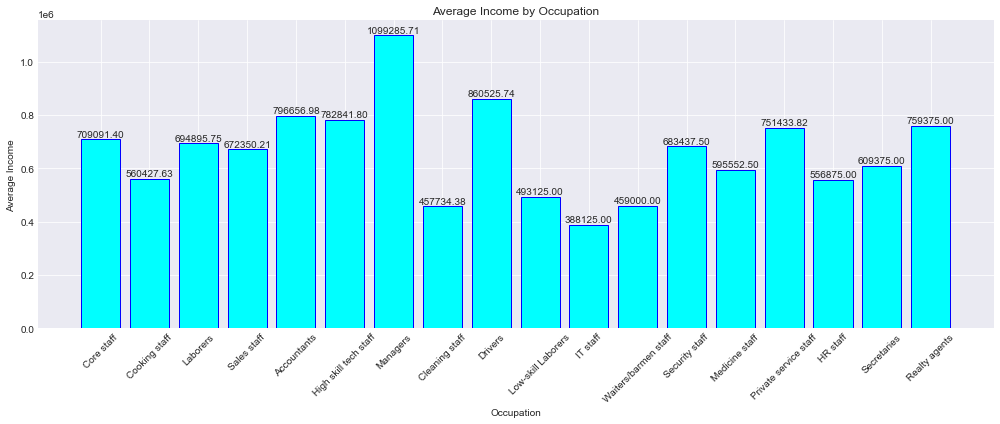

In [12]:
income_data = np.array(income_temp['Annual_income'])
occupation_data = np.array(income_temp['Occupation_type'])

occupations = income_temp['Occupation_type'].unique()
average_income = []
for i in occupations:
    incomes_in_range = [income for occupation, income in zip(occupation_data, income_data) if occupation == i]
    if incomes_in_range:
        average_income.append(sum(incomes_in_range) / len(incomes_in_range))
    else:
        average_income.append(0)

plt.figure(figsize=(14, 6))  
plt.style.use('seaborn-darkgrid')  

bars = plt.bar(occupations, average_income, color='cyan', edgecolor='blue')

for bar, income in zip(bars, average_income):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, f'{income:.2f}', ha='center', va='bottom')

plt.xlabel('Occupation')
plt.ylabel('Average Income')
plt.title('Average Income by Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()